### Import Libraries

In [1]:
# Manipulation Libraries
import pandas as pd
import numpy as np
import plotly_express as px
# Visualization Libraries (introducing plotly)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

> **Note**: The energy sector contributes about 40 percent of global emissions of CO2 ([source here](https://openknowledge.worldbank.org/handle/10986/17143?show=full#:~:text=The%20energy%20sector%20contributes%20about,energy%2Dsector%20emissions%20in%202010.)).

## I. Load & Explore Data

In [2]:
# Import the data
energy = pd.read_csv("energy_use_data_11-29-2021.csv")
print(energy.columns)
energy.describe()

Index(['Domain Code', 'Domain', 'Area Code (ISO3)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description'],
      dtype='object')


,Element Code,Item Code,Year Code,Year,Value
count,46131.0,46131.000000,46131.000000,46131.000000,46131.000000
mean,7273.0,6803.571720,1998.988814,1998.988814,863.132722
std,0.0,2.916637,13.111035,13.111035,5274.730687
min,7273.0,6800.000000,1970.000000,1970.000000,0.000000
25%,7273.0,6801.000000,1990.000000,1990.000000,3.370750
50%,7273.0,6804.000000,2000.000000,2000.000000,21.489900
75%,7273.0,6805.000000,2010.000000,2010.000000,165.728900
max,7273.0,6809.000000,2019.000000,2019.000000,197674.559300


* This dataframe contains 14 columns 
* from analyzing distribution of each column it is clear that 
1. this dataframe has data of total 50 year from 1970 to 2019.
2. this Dataframe contain data about, amount(specified by Value column) of Energy Usage in kilotonnes(specified by Unit columns) in different field(specified by Item column). 
3. Value column represent how many units of Energy is used in every Area/Country and in each Year.
4. Unit column represent the unit of Value column values.
5. There are Total 9 different type of Energy Sourch are there and those are 'Gas-Diesel oil', 'Motor Gasoline', 'Natural gas (including LNG)', 'Coal', 'Electricity', 'Liquefied petroleum gas (LPG)', 'Fuel oil', 'Gas-diesel oils used in fisheries', 'Fuel oil used in fisheries', and 'others' 
6. Flag description has two type of categorical values, where one is "FAO estimates" and other is "Aggregate, may include official, semi-official, estimated or calculated data"

* `in this analysis only Area, Area Code (ISO3), Item, Year, Value columns has been kept.`



In [3]:
energy=energy[['Area','Area Code (ISO3)','Item','Year','Value']]
energy.head()

,Area,Area Code (ISO3),Item,Year,Value
0,Afghanistan,AFG,Gas-Diesel oil,1990,231.4918
1,Afghanistan,AFG,Gas-Diesel oil,1991,188.5317
2,Afghanistan,AFG,Gas-Diesel oil,1992,47.9904
3,Afghanistan,AFG,Gas-Diesel oil,1993,38.6116
4,Afghanistan,AFG,Gas-Diesel oil,1994,31.4465


Distribution of each columns
1. data of 50 year from 1970 to 2019 has collected for each Area and year but it is not necessary that value of each column are available for each country.
2. distribution of Area column is not equal, showing that some of the value for each area is missing or never been collected and the reason of missing values can be anything like some of years of data might not be available, or some of the categories of energy usage data might not be available,
3. Distribution of Year column is also not equal. reason might be that some of Area, and  categorgory of  energy usage in not availabel.
4. Distribution of Item columns is also not equal. rason might be that some of the Araa and years of data is not available.

In [4]:
print('distribution of Area\n\n',energy['Area'].value_counts())
print('*'*80)
print('distribution of Year\n\n',energy['Year'].value_counts())
print('*'*80)
print('distribution of Year\n\n',energy['Item'].value_counts())


distribution of Area

 Japan                       407
Chile                       407
China                       396
Denmark                     395
New Zealand                 392
                           ... 
Sudan                        32
Turks and Caicos Islands     30
Liechtenstein                30
South Sudan                  24
Isle of Man                  18
Name: Area, Length: 229, dtype: int64
********************************************************************************
distribution of Year

 2016    1231
2015    1230
2014    1230
2017    1228
2013    1226
2018    1226
2012    1223
2011    1219
2010    1218
2009    1213
2008    1206
2007    1201
2006    1196
2005    1185
2004    1181
2003    1176
2002    1170
2001    1161
2000    1158
1999    1138
2019    1137
1998    1129
1997    1123
1996    1122
1995    1120
1994    1115
1993    1104
1992    1093
1991     968
1990     950
1989     712
1988     700
1987     688
1986     670
1985     653
1984     643
1983     633
19

Visualization of Distribution of each category of Energy usage. 
* first entire table get pivoted by considering index Area, year, and each category of Energy usage will be each columns, and Value column will be value of each cell for corresponding index(area, year) and corresponding columns(Energy Usage)
* since distribution of each categorys of energy usage is not equal so most of the cells are null values 
* all the null values of energy usage column are replaced by 0.00. the reason is simple and that is  if in a country's the consumption rate of any energy source is not high enough to mention in this dataset, then their numerical value of the consumption can be assumed to be zero.


In [5]:
energyPivot=pd.pivot_table(energy,index=['Area','Area Code (ISO3)','Year'],columns=['Item'],values=['Value'])
energyPivot.columns=energyPivot.Value.columns
energyPivot=energyPivot.reset_index()
energyPivot.fillna(0,inplace=True)
energyPivot['TotalUsage']=energyPivot.iloc[:,3:].sum(axis=1)
energyPivot

Item,Area,Area Code (ISO3),Year,Coal,Electricity,Fuel oil,Fuel oil used in fisheries,Gas-Diesel oil,Gas-diesel oils used in fisheries,Liquefied petroleum gas (LPG),Motor Gasoline,Natural gas (including LNG),TotalUsage
0,Afghanistan,AFG,1970,0.0000,4.1799,0.0000,0.0,0.0000,0.0,0.0000,1.1776,0.0,5.3575
1,Afghanistan,AFG,1971,0.0000,4.5282,0.0000,0.0,0.0000,0.0,0.0000,1.1448,0.0,5.6730
2,Afghanistan,AFG,1972,0.0000,5.5732,0.0000,0.0,0.0000,0.0,0.0000,0.9159,0.0,6.4891
3,Afghanistan,AFG,1973,0.0000,5.5732,0.0000,0.0,0.0000,0.0,0.0000,0.7632,0.0,6.3364
4,Afghanistan,AFG,1974,0.0000,6.6182,0.0000,0.0,0.0000,0.0,0.0000,0.9377,0.0,7.5559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,Zimbabwe,ZWE,2015,92.7458,424.3909,0.1478,0.0,321.8163,0.0,4.5917,42.9799,0.0,886.6724
9494,Zimbabwe,ZWE,2016,112.2713,213.9419,0.1459,0.0,270.8355,0.0,5.7397,36.8399,0.0,639.7742
9495,Zimbabwe,ZWE,2017,29.2882,187.7450,0.1440,0.0,280.3944,0.0,5.9693,36.8399,0.0,540.3808
9496,Zimbabwe,ZWE,2018,19.5254,218.3081,0.1421,0.0,340.9341,0.0,5.9693,52.1898,0.0,637.0688


* from the below visalization of different type of energy usage and distribution of no years of data it is obserbed that
1. year column distribution is not same. but it supposed to be same and it is not same because lots of data are not available.
2. Distribution of differnt type of energy usage are rigtht skewed, it means a few countries are there where consumption rate is extreamly high. 

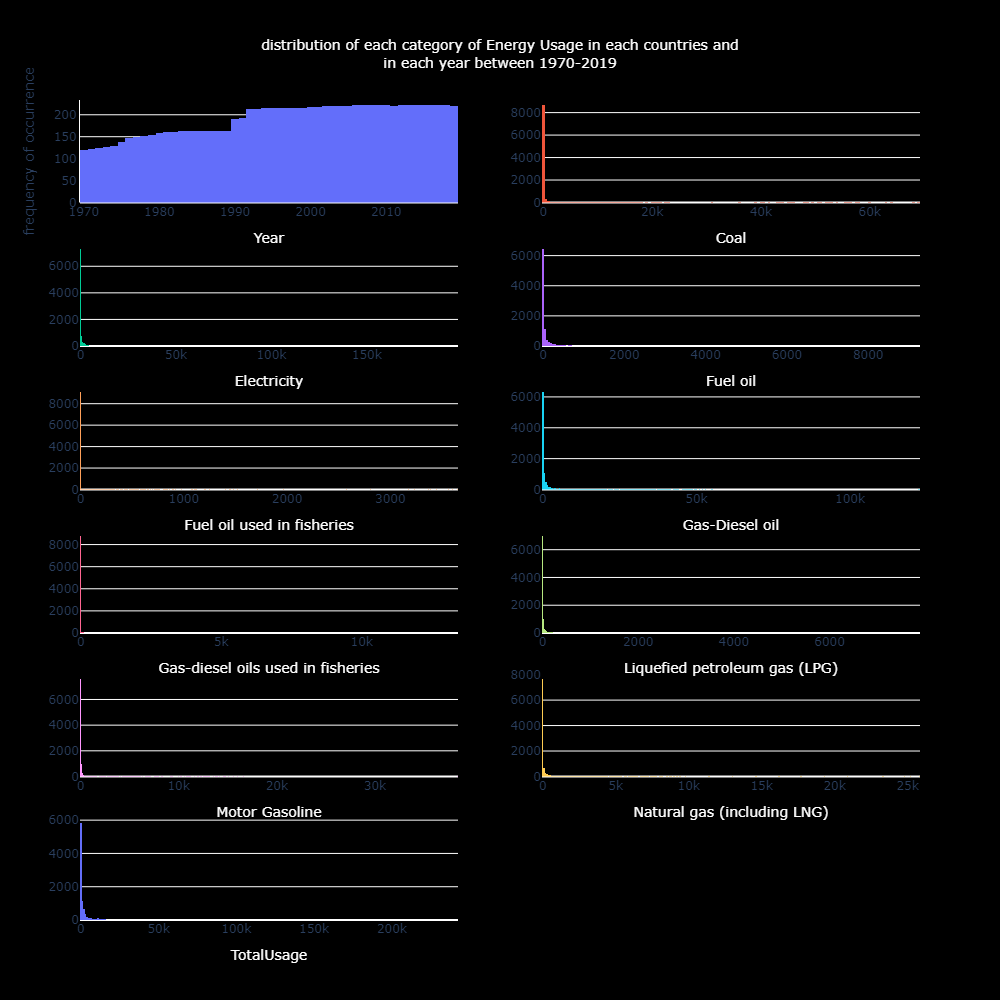

In [6]:
fig=make_subplots(rows=6, cols=2)
for i,colname in enumerate(energyPivot.columns[2:]):
    fig.append_trace(go.Histogram(x=energyPivot[colname],
                                  hovertemplate='%{x}:'),
                                 i//2+1,i%2+1
                                )
    # fig.update_yaxes(title_text="frequency of occurrence",title=dict(font=dict(size=14,color='white')), row=i//2+1, col=i%2+1,)
    fig.update_xaxes(title_text=f'{colname}',title=dict(font=dict(size=14,color='white')),row=i//2+1,col=i%2+1)

# fig.update_yaxes(title_text="frequency of occurrence",title=dict(font=dict(size=14,color='white')), row=6, col=1,)
# fig.update_xaxes(title_text=f'Year',title=dict(font=dict(size=14,color='white')),row=6,col=1)
fig.update_layout(
    height=1000,
    width=1000,
    title_text='distribution of each category of Energy Usage in each countries and<br>in each year between 1970-2019 ',
    yaxis=dict(title='frequency of occurrence',showline=True),   
    title=dict(x=0.5,xanchor='center',font=dict(color='white',size=14)),
    paper_bgcolor='black',
    plot_bgcolor='black',
    showlegend=False
)
fig.show('png')

## II. Prepare the Data

In [7]:
# Import the data
energy = pd.read_csv("energy_use_data_11-29-2021.csv")

# Keep the same countries as in Graph 1
areas_to_keep = ["China","Germany", "Japan", "United States of America"]

# Filter the data
energy = energy[(energy["Area"].isin(areas_to_keep)) & 
                (energy["Year"]==2019)].reset_index(drop=True)

# Rename some Areas
energy["Area"] = energy["Area"].replace(to_replace=["United States of America"],
                                        value=["United States"])

# Group by Area and Item
energy = energy.groupby(["Area", "Item"])["Value"].mean().reset_index()

# Compute percentage per country
totals = energy.groupby("Area")["Value"].sum().reset_index()
energy = pd.merge(energy, totals, on="Area")
energy["Perc"] = energy["Value_x"] / energy["Value_y"]
energy["Perc"] = energy["Perc"].apply(lambda x: round(x*100, 2))

# Look into the dataframe
energy.head()

,Area,Item,Value_x,Value_y,Perc
0,China,Coal,56612.4024,217671.2249,26.01
1,China,Electricity,105472.7129,217671.2249,48.46
2,China,Fuel oil,80.9078,217671.2249,0.04
3,China,Gas-Diesel oil,47328.8167,217671.2249,21.74
4,China,Liquefied petroleum gas (LPG),231.0721,217671.2249,0.11


## III. Create the Bubble Chart Final (Clean up Layout)

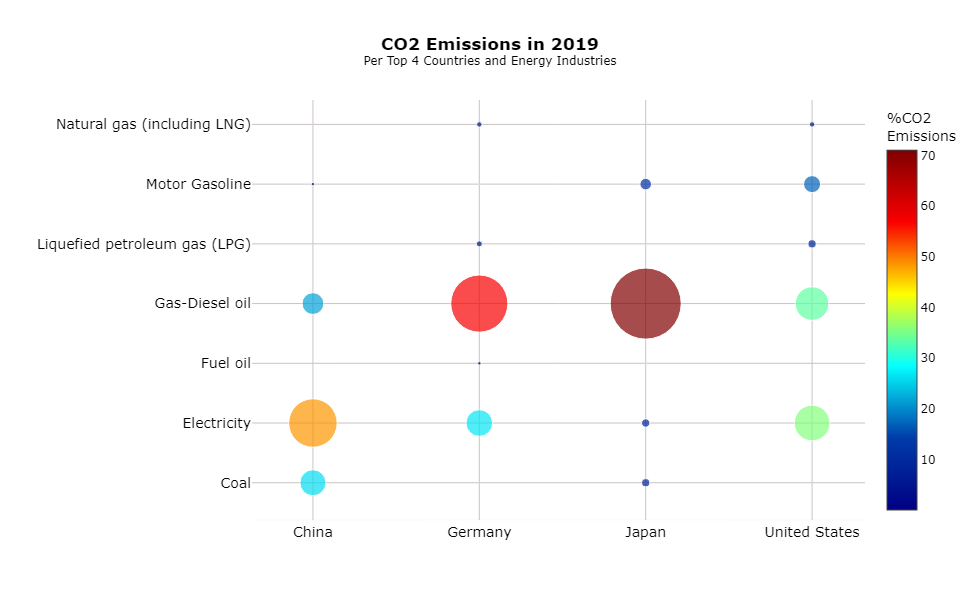

In [8]:
# Create the layout of the chart
title = "<b>CO2 Emissions in 2019</b><br><sup>Per Top 4 Countries and Energy Industries</sup>"
layout = go.Layout(width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   showlegend = False, 
                   title = {'text' : title, 'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'})

# Create the figure
fig = go.Figure( layout = layout)

# Create the base Scatter Plot
fig.add_trace(go.Scatter(
    # X and Y axis
    x=energy["Area"],
    y=energy["Item"],
    
    # The marker shape and size
    mode='markers', 
    hovertemplate="Country: %{x}<br>" +
                  "Industry: %{y}<br>" +
                  "CO2 Emissions: %{marker.size:,}%" +
                  "<extra></extra>",
    
    marker=dict(color=energy["Perc"],
                size=energy["Perc"],
                showscale=True,
                colorbar=dict(title='%CO2<br>Emissions'),
                opacity=0.7,
                colorscale='Jet')
))

# Update the x and y axis
fig.update_xaxes(showline=True, linewidth=0.1, linecolor='#c9c4c3', gridcolor='#c9c4c3',
                 tickfont=dict(size=14, color='black'), 
                 title="", showgrid=True, tickangle=0)

fig.update_yaxes(showline=False, linewidth=0.1, gridcolor='#c9c4c3',
                 tickfont=dict(size=14, color='black'), 
                 title="", showgrid=True)

# Show the graph
fig.show('png')

## IV. what is the industry with the biggest impact on CO2 emissions?

* IN this dataset we have information about consumption rate of each category of Energy Usage. But to find the industry which has biggest impact on CO2 emissions we have to find where more energy is consumed in those span of 50 years, since CO2 emission has direct proportionality with Energy consumption.
* it will be calculated categorically irresepective of year and Area values.
* And It is found that `GAS-DIESEL OIL` has highest consumption rate, which is `13.9 million kilotonnes`, so it must have highest impact on CO2.
* second industry which has second-highest impact on CO2 emission is `ELECTRICITY` whose consumption amount is `13.1 million kilotonnes`
* third industry which has third-highest impact on CO2 emission is `COAL`, whose total consumption amout is `6.1 million kilotonnes`

In [9]:
pd.DataFrame(energyPivot.iloc[:,3:].sum(axis=0)).rename(columns={0:'ConsumptionAmout( in kilotonnes)'}).sort_values(['ConsumptionAmout( in kilotonnes)'],ascending=False)

,ConsumptionAmout( in kilotonnes)
Item,
TotalUsage,3.981718e+07
Gas-Diesel oil,1.392424e+07
Electricity,1.314191e+07
Coal,6.157932e+06
Motor Gasoline,2.296991e+06
Natural gas (including LNG),1.707940e+06
Fuel oil,1.123705e+06
Gas-diesel oils used in fisheries,8.061251e+05
Liquefied petroleum gas (LPG),5.237612e+05


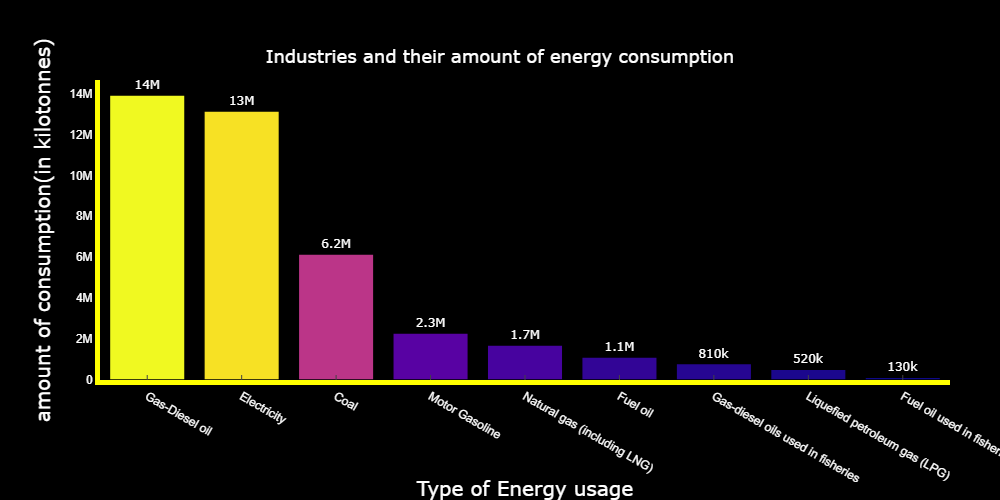

In [10]:
fig = go.Figure()
Industries_consumption_amount=pd.DataFrame(energyPivot.iloc[:,3:-1].sum(axis=0)).rename(columns={0:'ConsumptionAmout( in kilotonnes)'}).sort_values(['ConsumptionAmout( in kilotonnes)'],ascending=False).reset_index()
fig.add_trace(
    go.Bar(x=Industries_consumption_amount['Item'].values,
            y=Industries_consumption_amount['ConsumptionAmout( in kilotonnes)'].values,
            marker_color=Industries_consumption_amount['ConsumptionAmout( in kilotonnes)'].values,
            marker_line_color='black',
            marker_line_width=1.5,
            opacity=1,
            
            )    
)
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside',textfont_color='white')    
fig.update_layout(title='Industries and their amount of energy consumption\n',
                    titlefont=dict(
                                    size=18,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                    xaxis_title='Type of Energy usage',
                    yaxis_title='amount of consumption(in kilotonnes)',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=500,
                    width=1000
                    )
fig.update_layout( xaxis=dict(
                                showline=True,
                                showgrid=False,
                                showticklabels=True,
                                linecolor='yellow',
                                linewidth=5,
                                # gridcolor='gray',
                                # gridwidth=0.1,

                                ticks='inside',

                                tickfont=dict(
                                        family='Arial',
                                        size=12,
                                        color='white',
                                        ),
                                titlefont=dict(
                                        size=20,
                                        color='white'
                                        )
                              ),
                    yaxis=dict(
                        tickfont=dict(
                                    family='Arial',
                                    size=12,
                                    color='white',
                                    ),
                        titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                        linecolor='yellow',
                        linewidth=5,
                        showgrid=False,
                        # gridcolor='gray',
                        # gridwidth=0.1,
                        zeroline=False,
                        # zerolinecolor='red',
                        showline=True,
                        showticklabels=True,
                        ),
                        autosize=True,
                        margin=dict(
                                    autoexpand=False, 
                                    l=100,
                                    r=50,
                                    t=80,
                                    b=120
                                    ),
                        ) 
fig.show('png')

## V. what is the country that has improved the most in reducing its CO2 emissions throughout years?

In [11]:
YearWiseconsumption=energyPivot[['Area','Area Code (ISO3)', 'Year','TotalUsage']]
YearWiseconsumption=pd.pivot_table(YearWiseconsumption,index=['Area','Area Code (ISO3)'],columns=['Year'],values=['TotalUsage'])
YearWiseconsumption.columns=YearWiseconsumption.TotalUsage.columns
YearWiseconsumption.reset_index(inplace=True)
YearWiseconsumption["Area"] = YearWiseconsumption["Area"].replace(to_replace=["United States of America"],
                                        value=["United States"])

YearWiseconsumption["Area"] = YearWiseconsumption["Area"].replace(to_replace=["United Kingdom of Great Britain and Northern Ireland"],
                                        value=["United Kingdom"])

YearWiseconsumption["Area"] = YearWiseconsumption["Area"].replace(to_replace=["Bolivia (Plurinational State of)"],
                                        value=["Bolivia"])

YearWiseconsumption["Area"] = YearWiseconsumption["Area"].replace(to_replace=["Iran (Islamic Republic of)"],
                                        value=["Iran"])
YearWiseconsumption["Area"] = YearWiseconsumption["Area"].replace(to_replace=["Micronesia (Federated States of)"],
                                        value=["Micronesia"])
YearWiseconsumption["Area"] = YearWiseconsumption["Area"].replace(to_replace=["Venezuela (Bolivarian Republic of)"],
                                        value=["Venezuela"])
YearWiseconsumption.head()

Year,Area,Area Code (ISO3),1970,1971,1972,1973,1974,1975,1976,1977,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,5.3575,5.6730,6.4891,6.3364,7.5559,8.2199,8.1435,9.3956,...,368.1423,424.5118,394.8065,290.4531,249.4576,269.9269,218.1406,170.4275,172.3669,156.9488
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,277.4745,347.4559,294.5946,357.5667,396.6364,387.2758,383.8307,436.0394,443.3158,324.3207
2,Algeria,DZA,24.0696,40.6675,44.5376,53.2107,55.2159,61.4652,65.2457,80.0086,...,833.1765,917.0769,989.6368,764.2979,1222.9178,1201.7263,1214.5831,1280.9294,1067.9930,1037.0082
3,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.3768,20.1011,19.6816,19.7989,19.1506,19.4042,19.7583,19.7596,20.4520,20.7123
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,164.8406,172.3793,163.4885,174.8946,178.4510,161.9564,218.0189,173.4848,186.8427,188.5209


* This heat map shows the existance of certain countries.
* the white color represent the existance of countries.
* and black line represent the time line when corresponding areas were not recognize as a countries.
> it is observed that, some of the coutries do not exit before 1990 after that those are recognized as a countries/Area and corresponding energy consumption data also collected

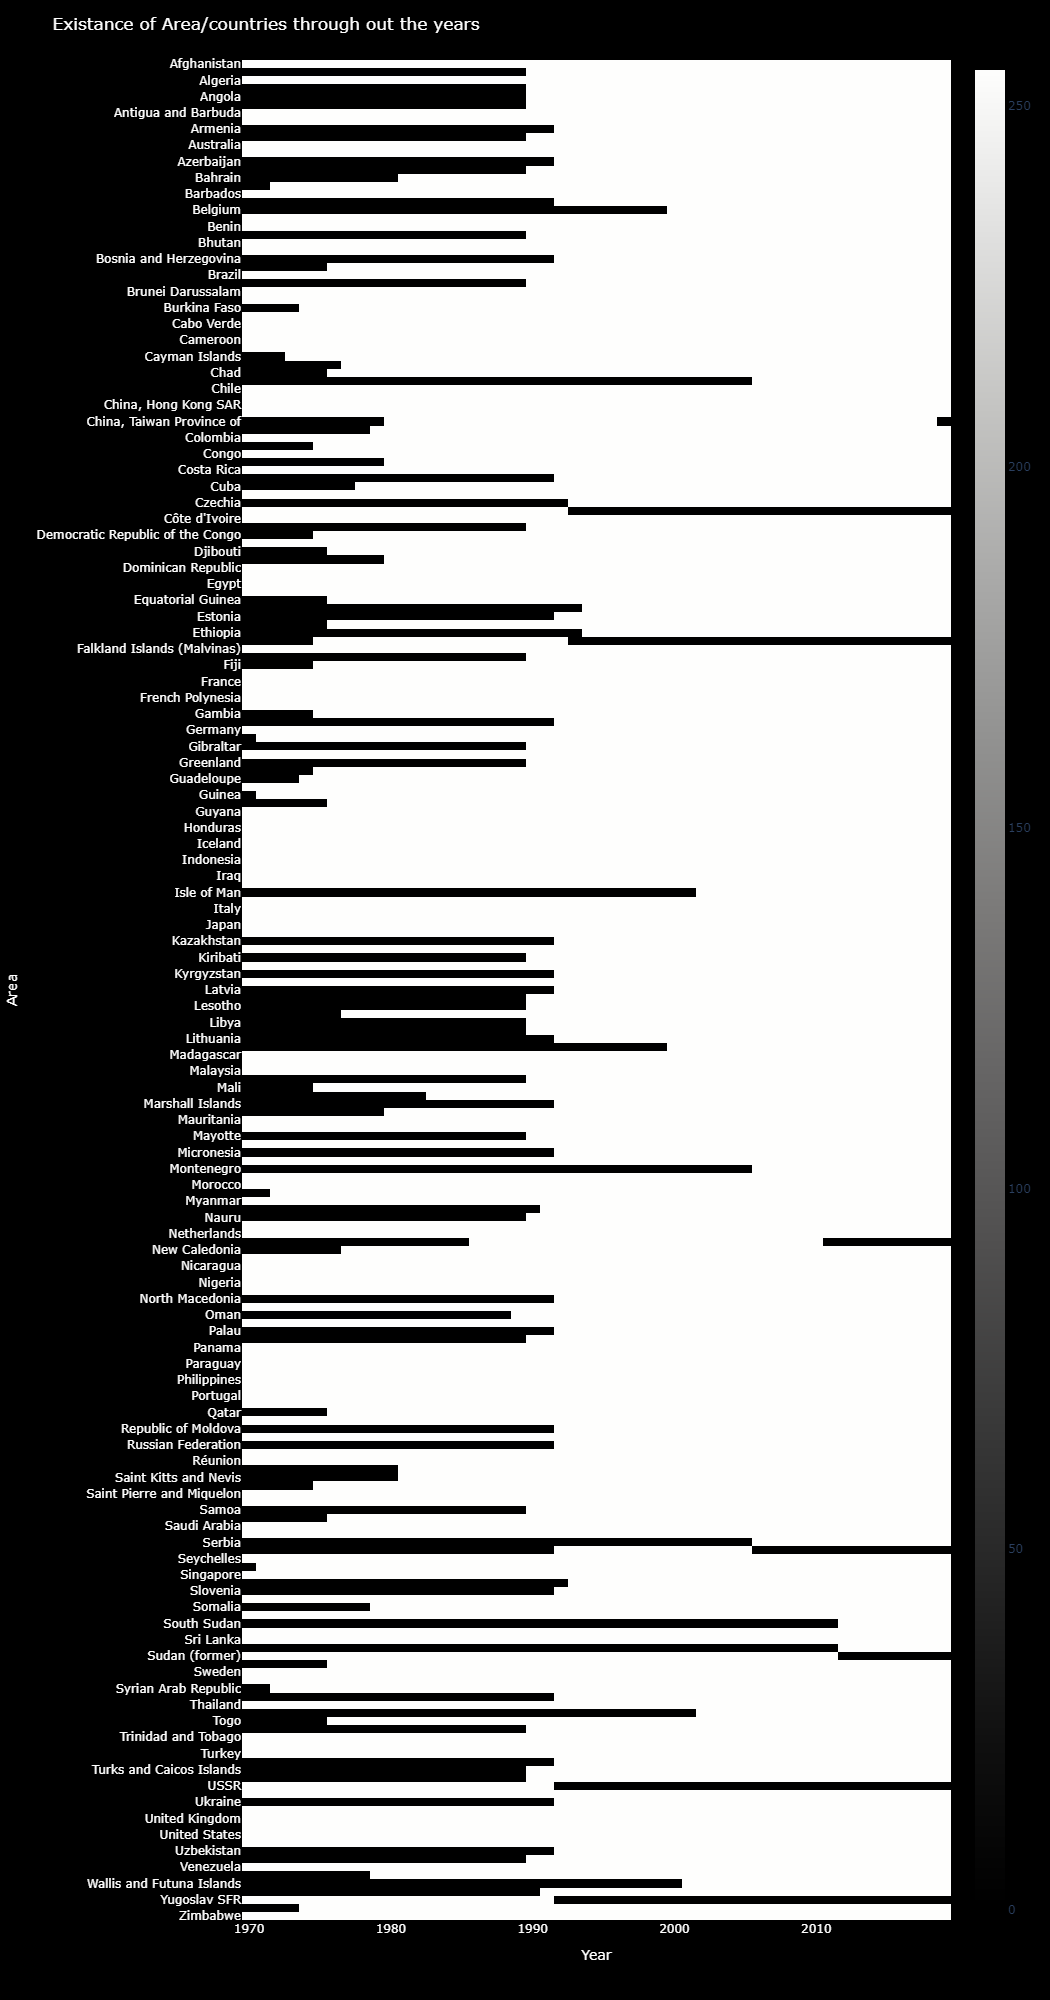

In [12]:
existanceArea=YearWiseconsumption.copy()
existanceArea.iloc[:,2:]=~(YearWiseconsumption.iloc[:,2:].isnull())
existanceArea.drop(columns=['Area Code (ISO3)'],inplace=True)
existanceArea.set_index('Area',inplace=True)
fig = px.imshow(existanceArea, color_continuous_scale='gray')

fig.update_layout(title='Existance of Area/countries through out the years',
                  title_font_color='white',
                  height=2000,
                  width=1050,
                  paper_bgcolor='black',
                  plot_bgcolor='black',
                  xaxis=dict(color='white'),
                  yaxis=dict(color='white'),
                  
                 )
fig.show('png')

* After 1992 very few countries/Area name are there which is not exist anymore.
* so if dataframe will be filtered by year from 1992 to 2019 then heat map will look like this

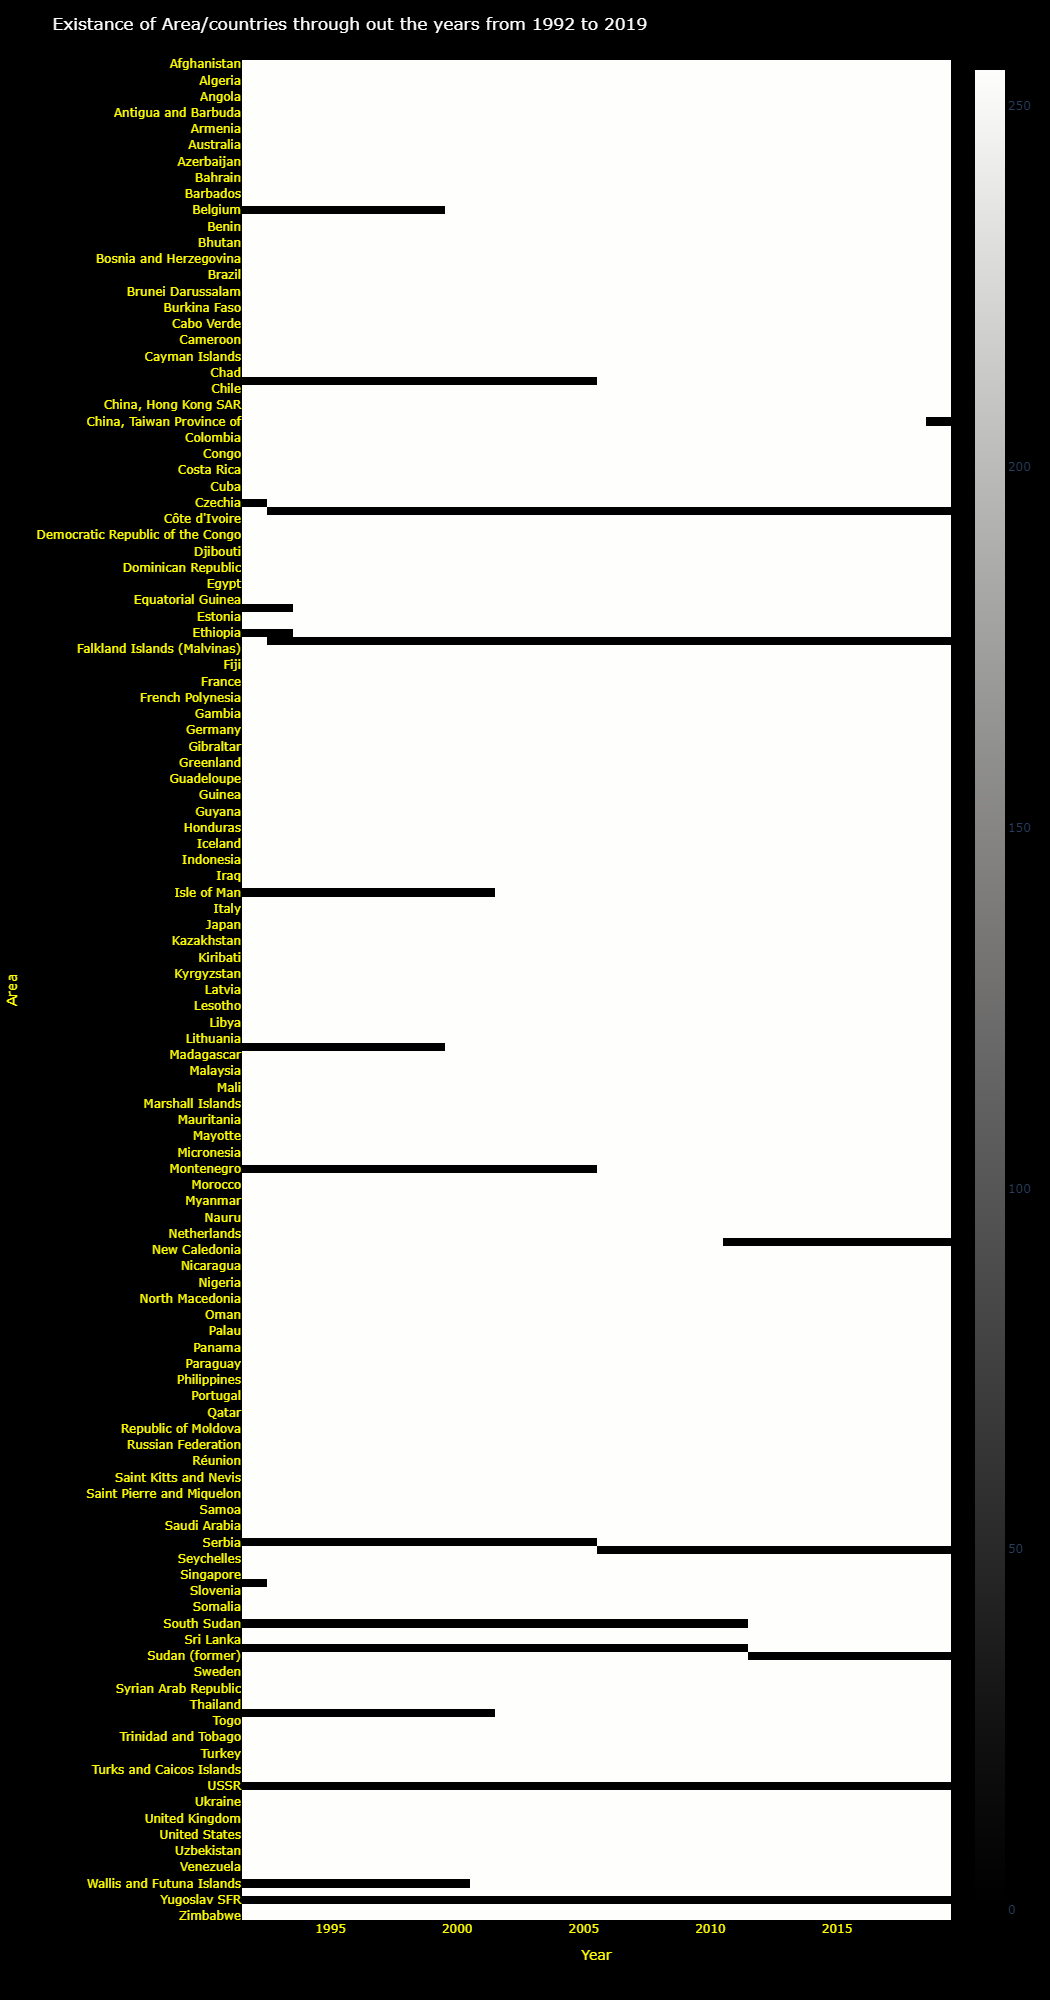

In [13]:
existanceArea=YearWiseconsumption.copy()
existanceArea.iloc[:,2:]=~(YearWiseconsumption.iloc[:,2:].isnull())
existanceArea.drop(columns=['Area Code (ISO3)'],inplace=True)
existanceArea.set_index('Area',inplace=True)
fig = px.imshow(existanceArea.loc[:,1992:], color_continuous_scale='gray')

fig.update_layout(title='Existance of Area/countries through out the years from 1992 to 2019',
                  title_font_color='white',
                  height=2000,
                  width=1050,
                  paper_bgcolor='black',
                  plot_bgcolor='black',
                  xaxis=dict(color='yellow'),
                  yaxis=dict(color='yellow'),
                  
                 )
fig.show('png')

* question is to find area with hightest improvment in reduction of CO2 emission through out the year from 1970 to 2019.
* since data of most of countires are not available upto year 1991, So data will be considered from 1992 to 2019.
* so there total should be 28 no of year of data available for each countries.
* After selecting data by filetering Year value from 1992, few of the coutries still remain with huge no of missing values, so those Area/countries will be removed.
* Area/Countries with low usage of energy, will emits low CO2 gas.
* So to find Area with highest improvement in reduction of energy usage, we have to analyze change in Energy Usage of each countries by incorporating energy usage of each pair of consecutive year.
* since CO2 emission can increase global warming so it would be expected that Energy usage in each year will be less than previous year for each countries. so reduction in Usage is calcualated by subtracting current year usage with previous year usage, and then it will be stored in dataframe for further analysis.
*  so After this reduction process the result would be positive if there is reduction in usage otherwise result would be negative. then all the result after this difference opeation will added up.
* At the end after the previous summation process, the  area with highest addition result would be the Area where the CO2 emission would be improved.


In [14]:
YearWiseconsumption1992=YearWiseconsumption.set_index('Area').copy()
YearWiseconsumption1992=YearWiseconsumption1992.loc[:,1992:].reset_index()
YearWiseconsumption1992.dropna(axis=0,inplace=True)
YearWiseconsumption1992.head()

Year,Area,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,72.7012,60.1693,48.5428,44.3846,38.6532,34.0385,31.6161,27.8034,27.8359,...,368.1423,424.5118,394.8065,290.4531,249.4576,269.9269,218.1406,170.4275,172.3669,156.9488
1,Albania,162.3529,125.6338,91.2058,154.2895,148.2506,111.4989,133.7844,280.8440,275.6874,...,277.4745,347.4559,294.5946,357.5667,396.6364,387.2758,383.8307,436.0394,443.3158,324.3207
2,Algeria,253.9165,253.9378,241.1863,235.6236,238.5212,246.7077,251.3283,264.9401,272.2803,...,833.1765,917.0769,989.6368,764.2979,1222.9178,1201.7263,1214.5831,1280.9294,1067.9930,1037.0082
3,Andorra,24.2491,23.8090,23.8295,26.5846,28.5710,29.2189,30.9853,31.9020,30.2426,...,22.3768,20.1011,19.6816,19.7989,19.1506,19.4042,19.7583,19.7596,20.4520,20.7123
4,Angola,36.3058,39.8899,69.4279,64.6451,59.1527,50.8613,42.6637,46.6360,41.5928,...,164.8406,172.3793,163.4885,174.8946,178.4510,161.9564,218.0189,173.4848,186.8427,188.5209


from the below figure it is clear that the dataframe YearWiseReduction does not have nay null value anymore.

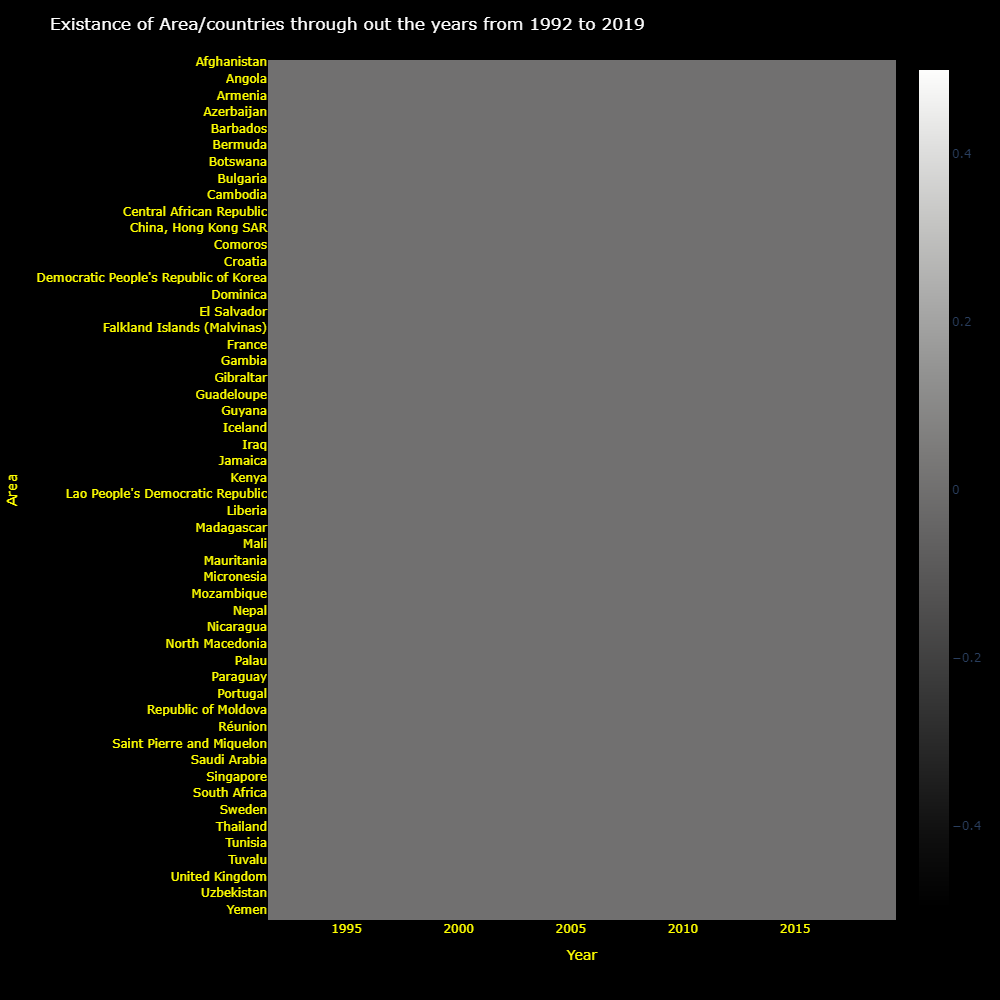

In [15]:
fig = px.imshow(YearWiseconsumption1992.set_index('Area').loc[:,1992:].isnull(), color_continuous_scale='gray')
fig.update_layout(title='Existance of Area/countries through out the years from 1992 to 2019',
                  title_font_color='white',
                  height=1000,
                  width=1000,
                  paper_bgcolor='black',
                  plot_bgcolor='black',
                  xaxis=dict(color='yellow'),
                  yaxis=dict(color='yellow'),                  
                 )
fig.show('png')

* In this phase differnce between energy usage value of each pair of cosecutive years will be calculated. 
* `reduction of energy usage in each year =(energy usage in each Year)-(energy usage in repsective previous year)`  
* then total energy reduction incorporating each year from 1992 to 2019 for each countries are calculated.
* then mean, median, std of energy usage reduction in each year is calculated for each countries/Area.
* then top performing countries with selected on the basis of mean, or total energy reduction.
* countries with maximum value of mean or total energy reduction, will be selected as top performer.

In [16]:
YearWiseReduction=YearWiseconsumption1992.copy()
for year in range(2019,1992,-1):
    YearWiseReduction[year]=np.subtract(YearWiseconsumption1992[year-1],YearWiseconsumption1992[year])
# adding mean,std,median of row vales.
YearWiseReduction['MeanReductionRate']=YearWiseReduction.loc[:,1993:].mean(axis=1)
YearWiseReduction['STDReductionRate']=YearWiseReduction.loc[:,1993:'MeanReductionRate'].std(axis=1)
YearWiseReduction['MedianReductionRate']=YearWiseReduction.loc[:,1993:'MeanReductionRate'].median(axis=1)
YearWiseReduction['TotalReduction']=YearWiseReduction.loc[:,1993:'MeanReductionRate'].sum(axis=1)
YearWiseReduction.head()

Year,Area,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2014,2015,2016,2017,2018,2019,MeanReductionRate,STDReductionRate,MedianReductionRate,TotalReduction
0,Afghanistan,72.7012,12.5319,11.6265,4.1582,5.7314,4.6147,2.4224,3.8127,-0.0325,...,40.9955,-20.4693,51.7863,47.7131,-1.9394,15.4181,-3.120281,42.517238,1.194950,-87.367881
1,Albania,162.3529,36.7191,34.4280,-63.0837,6.0389,36.7517,-22.2855,-147.0596,5.1566,...,-39.0697,9.3606,3.4451,-52.2087,-7.2764,118.9951,-5.998807,91.196800,1.741300,-167.966607
2,Algeria,253.9165,-0.0213,12.7515,5.5627,-2.8976,-8.1865,-4.6206,-13.6118,-7.3402,...,-458.6199,21.1915,-12.8568,-66.3463,212.9364,30.9848,-29.003396,118.237199,-13.011950,-812.095096
3,Andorra,24.2491,0.4401,-0.0205,-2.7551,-1.9864,-0.6479,-1.7664,-0.9167,1.6594,...,0.6483,-0.2536,-0.3541,-0.0013,-0.6924,-0.2603,0.130993,1.150839,0.171896,3.667793
4,Angola,36.3058,-3.5841,-29.5380,4.7828,5.4924,8.2914,8.1976,-3.9723,5.0432,...,-3.5564,16.4946,-56.0625,44.5341,-13.3579,-1.6782,-5.637596,18.091332,-4.804948,-157.852696


In [17]:
Reduc_Analysis_mtx=YearWiseReduction[['Area','MeanReductionRate','STDReductionRate','MedianReductionRate','TotalReduction']]
Reduc_Analysis_mtx.head()

Year,Area,MeanReductionRate,STDReductionRate,MedianReductionRate,TotalReduction
0,Afghanistan,-3.120281,42.517238,1.194950,-87.367881
1,Albania,-5.998807,91.196800,1.741300,-167.966607
2,Algeria,-29.003396,118.237199,-13.011950,-812.095096
3,Andorra,0.130993,1.150839,0.171896,3.667793
4,Angola,-5.637596,18.091332,-4.804948,-157.852696


* Russina Federation has reduced their energy consumption/as well as CO2 emission by 49k kilotonnes , which is highest among all other countries.
* Then Japan has reduced their consumption by 42K kilotonnes.
* Ukrain has reduced their consumption by 27K kilotonnes.
* then Korea has reduced their cosumption by 19K kilotonnes.
* then kazakhstan has reduced their by 10k kilotonnes.


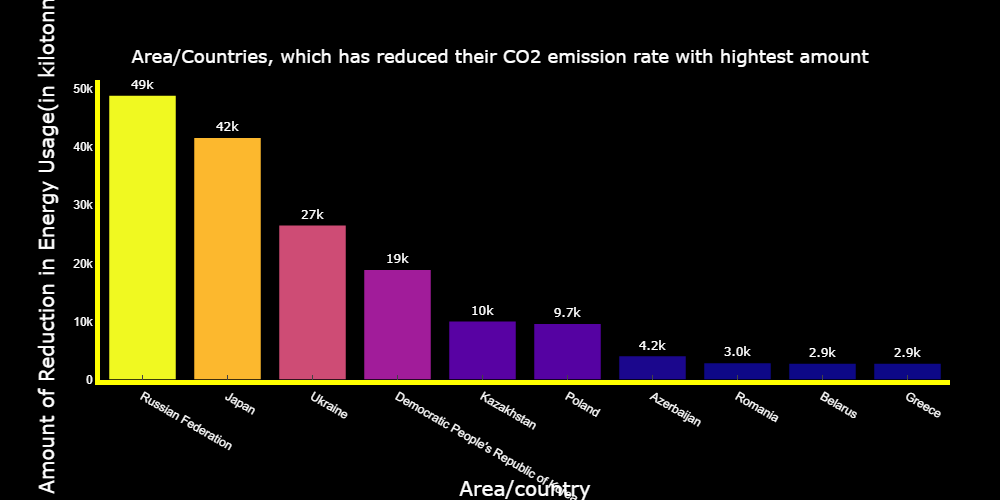

In [18]:
# Reduc_Analysis_mtx.sort_values(['TotalReduction'],ascending=False).head(10)
fig = go.Figure()
Areas_High_Reduction_Usage=Reduc_Analysis_mtx.sort_values(['TotalReduction'],ascending=False).head(10)
fig.add_trace(
    go.Bar(x=Areas_High_Reduction_Usage['Area'].values,
            y=Areas_High_Reduction_Usage['TotalReduction'].values,
            marker_color=Areas_High_Reduction_Usage['TotalReduction'].values,
            marker_line_color='black',
            marker_line_width=1.5,
            opacity=1,
            
            )    
)
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside',textfont_color='white')    
fig.update_layout(title='Area/Countries, which has reduced their CO2 emission rate with hightest amount',
                    titlefont=dict(
                                    size=18,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                    xaxis_title='Area/country',
                    yaxis_title='Amount of Reduction in Energy Usage(in kilotonnes)',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=500,
                    width=1000
                    )
fig.update_layout( xaxis=dict(
                                showline=True,
                                showgrid=False,
                                showticklabels=True,
                                linecolor='yellow',
                                linewidth=5,
                                # gridcolor='gray',
                                # gridwidth=0.1,

                                ticks='inside',

                                tickfont=dict(
                                        family='Arial',
                                        size=12,
                                        color='white',
                                        ),
                                titlefont=dict(
                                        size=20,
                                        color='white'
                                        )
                              ),
                    yaxis=dict(
                        tickfont=dict(
                                    family='Arial',
                                    size=12,
                                    color='white',
                                    ),
                        titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                        linecolor='yellow',
                        linewidth=5,
                        showgrid=False,
                        # gridcolor='gray',
                        # gridwidth=0.1,
                        zeroline=False,
                        # zerolinecolor='red',
                        showline=True,
                        showticklabels=True,
                        ),
                        autosize=True,
                        margin=dict(
                                    autoexpand=False, 
                                    l=100,
                                    r=50,
                                    t=80,
                                    b=120
                                    ),
                        ) 
fig.show('png')

* By considering mean value of rate of change energy usage in each year, it is found that the top countries where energy usage rate has decreased drastically incomparison to other countries are same as result found on the basis of total reduction amount.
* Russian federation has reduced their consumpiton amount by the mean value 1.7k kilotonnes in each year from 1992 to 2019.
* then japan with rate of 1.5k kilotonnes per year.
* then Ukrain with rate of 950 kilotonnes per year.
* then south Korea with rate of 680 kilotonnes per year.
* then Kazakhstan with the rate of 360 kilotonnes per year.

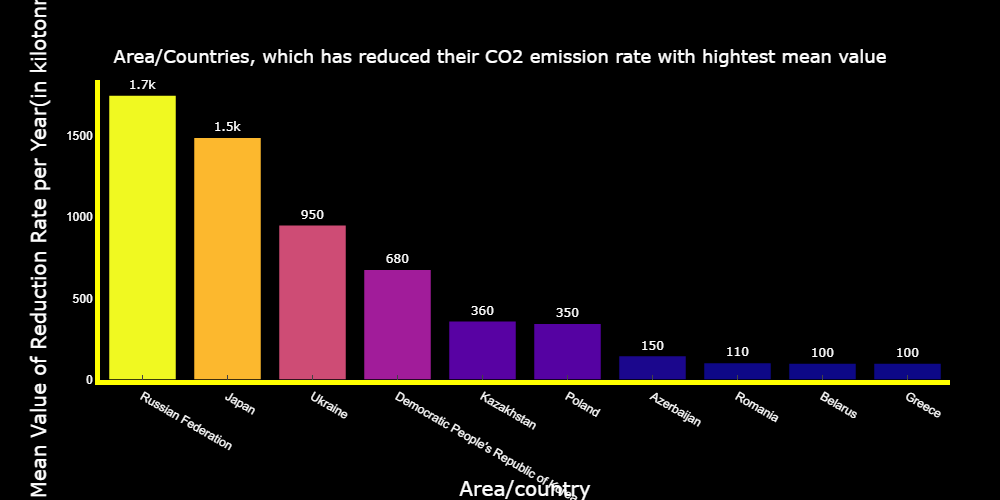

In [19]:
# Reduc_Analysis_mtx.sort_values(['TotalReduction'],ascending=False).head(10)
fig = go.Figure()
Areas_High_Mean_Reduction_Usage=Reduc_Analysis_mtx.sort_values(['MeanReductionRate'],ascending=False).head(10)
fig.add_trace(
    go.Bar(x=Areas_High_Mean_Reduction_Usage['Area'].values,
            y=Areas_High_Mean_Reduction_Usage['MeanReductionRate'].values,
            marker_color=Areas_High_Mean_Reduction_Usage['MeanReductionRate'].values,
            marker_line_color='black',
            marker_line_width=1.5,
            opacity=1,
            
            )    
)
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside',textfont_color='white')    
fig.update_layout(title='Area/Countries, which has reduced their CO2 emission rate with hightest mean value',
                    titlefont=dict(
                                    size=18,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                    xaxis_title='Area/country',
                    yaxis_title='Mean Value of Reduction Rate per Year(in kilotonnes)',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=500,
                    width=1000
                    )
fig.update_layout( xaxis=dict(
                                showline=True,
                                showgrid=False,
                                showticklabels=True,
                                linecolor='yellow',
                                linewidth=5,
                                # gridcolor='gray',
                                # gridwidth=0.1,

                                ticks='inside',

                                tickfont=dict(
                                        family='Arial',
                                        size=12,
                                        color='white',
                                        ),
                                titlefont=dict(
                                        size=20,
                                        color='white'
                                        )
                              ),
                    yaxis=dict(
                        tickfont=dict(
                                    family='Arial',
                                    size=12,
                                    color='white',
                                    ),
                        titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                        linecolor='yellow',
                        linewidth=5,
                        showgrid=False,
                        # gridcolor='gray',
                        # gridwidth=0.1,
                        zeroline=False,
                        # zerolinecolor='red',
                        showline=True,
                        showticklabels=True,
                        ),
                        autosize=True,
                        margin=dict(
                                    autoexpand=False, 
                                    l=100,
                                    r=50,
                                    t=80,
                                    b=120
                                    ),
                        ) 
fig.show('png')

## VI. have the emissions been increasing or decreasing?

* Since the CO2 emission is depened upon Consumption of different type of energy Sources, So to calculate that  the CO2 emission has increased or decreased in that  50 year span from 1970 to 2019 we have to calcualte that there is incrase in consumption or not.
* some of the coutries are there whose consumption amount are null since some of the countries divided into mulitple countries and there are also some countries that are combined into one country.
* For this analysis total energy usage amount of each country are aggregated for each year.
* all the null values are replaced by zero since value of each cell are in absoulute form and even if some of the coutries are divided into more than one countries, still it wont affect the overall result. for example 'SUDAN (FORMER)' is divided into 'SUDAN', AND 'SOUTH SUDAN' in 2011. so in this case data of each cell of sudan, south sudan, and sudan(former) are zero,zero and non zero value respectively before 2011 but after that it non zero, non zero, zero repectievly. since this all the values are in absolute form so it can be added here without any conflict or error. to simplify it further let take an assumption that if it will be assumed that there were not splitting of this country sudan(former) and after 2011 the summation of the data collected in the south sudan and sudan would have been collected in former sudan. so for this problem where entire consumption amount is being calculated per each year, replacing null values wont make any error.
> * from the below graph it is clear that through out the years Energy Usage in whole world has increased from 0.2 million to 1.2 million kilotonnes.
> * So CO2 emission must have increased since it has direct proportionality with Energy Usage.

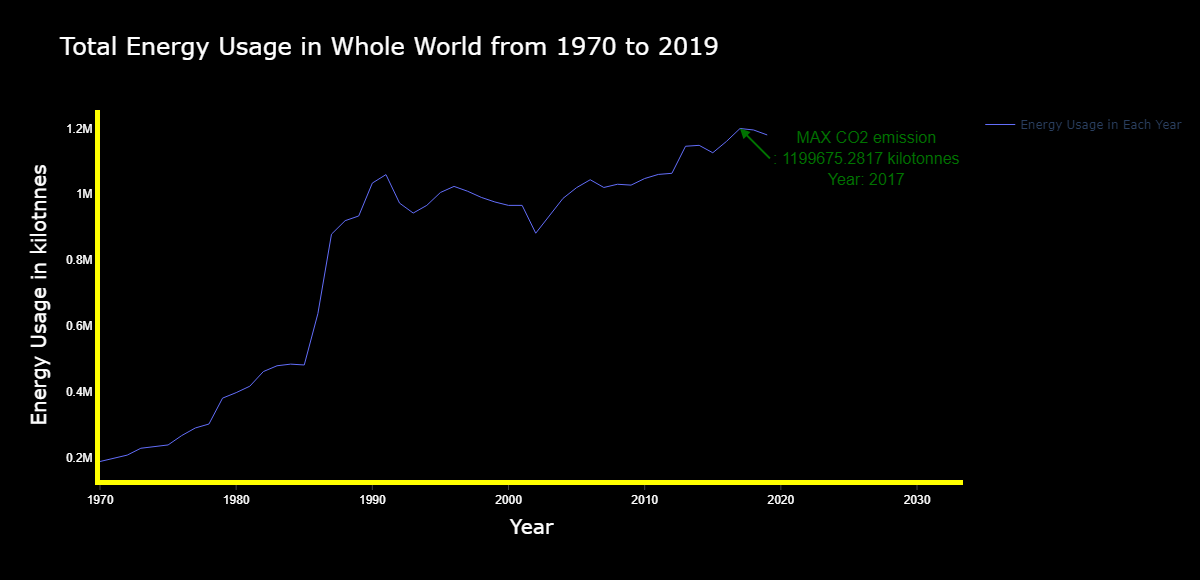

In [20]:
totalYearWiseUsage=YearWiseconsumption.fillna(0)
totalYearWiseUsage=totalYearWiseUsage.loc[:,1970:].sum(axis=0)
fig = go.Figure()

fig.add_trace(go.Scatter(x=totalYearWiseUsage.index, y=totalYearWiseUsage.values,
                mode='lines',
                name='Energy Usage in Each Year',
                line=dict( width=1),
                        connectgaps=True,
                        line_shape='linear'
                        ))
fig.update_layout(title='Total Energy Usage in Whole World from 1970 to 2019',
                    titlefont=dict(
                                    size=24,
                                    color='white'
                                    ),
                    xaxis_title='Year',
                    yaxis_title='Energy Usage in kilotnnes',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=580,
                    width=1200
                    )
fig.update_layout(
xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='yellow',
        linewidth=5,
        ticks='outside',
        tickfont=dict(
                    family='Arial',
                    size=12,
                    color='white',
                    ),
        titlefont=dict(
                    size=20,
                    color='white'
                    )
                    ),
yaxis=dict(
    tickfont=dict(
                family='Arial',
                size=12,
                color='white',
                ),
    titlefont=dict(
                size=20,
                color='white'
                ),
    linecolor='yellow',
    linewidth=5,
    showgrid=False,
    zeroline=True,
    showline=True,
    showticklabels=True,
    ),
    autosize=True,
    margin=dict(
                autoexpand=True,
                l=100,
                r=100,
                t=110,
                b=100
                ),
    showlegend=True,
    # plot_bgcolor="black"
    )
annotations=[]
maxCo2emit=totalYearWiseUsage[totalYearWiseUsage.idxmax()]


annotations.append(dict( x=totalYearWiseUsage.idxmax(),
                        y=maxCo2emit,
                        xref='x',
                        yref='y',
                        xanchor='left',
                        yanchor='middle',
                        align='center',
                        text=f'MAX CO2 emission<br>: {maxCo2emit} kilotonnes<br>Year: {totalYearWiseUsage.idxmax()}',
                        font=dict(family='Arial',
                                    size=16,
                                    color='green'),
                        showarrow=True,
                        arrowhead=2,
                        arrowsize=1,
                        arrowwidth=2,
                        arrowcolor='green',
                        ax=30,
                        ay=30,
                        bordercolor="black",
                        borderwidth=1,
                        borderpad=2,
                        bgcolor="black",
                        opacity=0.9
                        ),

                        )

fig.update_layout(annotations=annotations)

fig.show('png')

## VII. what is the year with the biggest impact on CO2 emissions?

> * In 2017, highest CO2 emission has observed 
> * Total 1.966 million kilotonnes of CO2 emitted in that year, which was highest in that span of 50 years.

In [21]:
maxtemp=(totalYearWiseUsage)[(totalYearWiseUsage).idxmax()]
maxtemp,totalYearWiseUsage.idxmax()

(1199675.2817, 2017)

### Benefits of `plotly`:

Plotly brings Data Visualization to a more elevated level. It is a rather "easy" (not simple - but easy to learn) way to bring interactivity to a plot. Moreover, `plotly` adds a few more "graph types" that differenciate from the basic histogram, line chart, bar chart, scatterplot etc. that we are already so acquainted with.

> **Reference**: I was inspired by the amazing notebook on [Data Science in 2021 : Adaptation or Adoption?](https://www.kaggle.com/shivamb/data-science-in-2021-adaptation-or-adoption/notebook) by Shivam Bansal and Kun Hao Yeh. I highly encourage you to browse the winning notebooks from the Kaggle Competitions on [Data Science and Machine Learning Surveys](https://www.kaggle.com/c/kaggle-survey-2021) and take inspiration from them when building your own graphs.

### Further Inquires:

* what is the industry with the biggest impact on CO2 emissions?
* what is the country that has improved the most in reducing its CO2 emissions throughout years?
* have the emissions been increasing or decreasing?
* what is the year with the biggest impact on CO2 emissions?